Model Performance Metrics:
R-squared (R²) Score: 0.0728
Mean Squared Error (MSE): 3160318.8196
Root Mean Squared Error (RMSE): 1777.7286
Mean Absolute Error (MAE): 1511.2836
Cross-validation R² scores: [0.05582347 0.0704754  0.03285286 0.06265779 0.07127676]
Mean CV R² score: 0.0586

Model Coefficients:
MonthlyPayment: 385.6265
IncomeTotal: 156.3429
Intercept: 7008.2200

For monthly payment of $3000 and total income of $7000:
Predicted desired savings: $2000.00
Savings percentage of total income: 28.57%
Months to reach savings goal of $20000: 10


C:\Users\Fatima\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


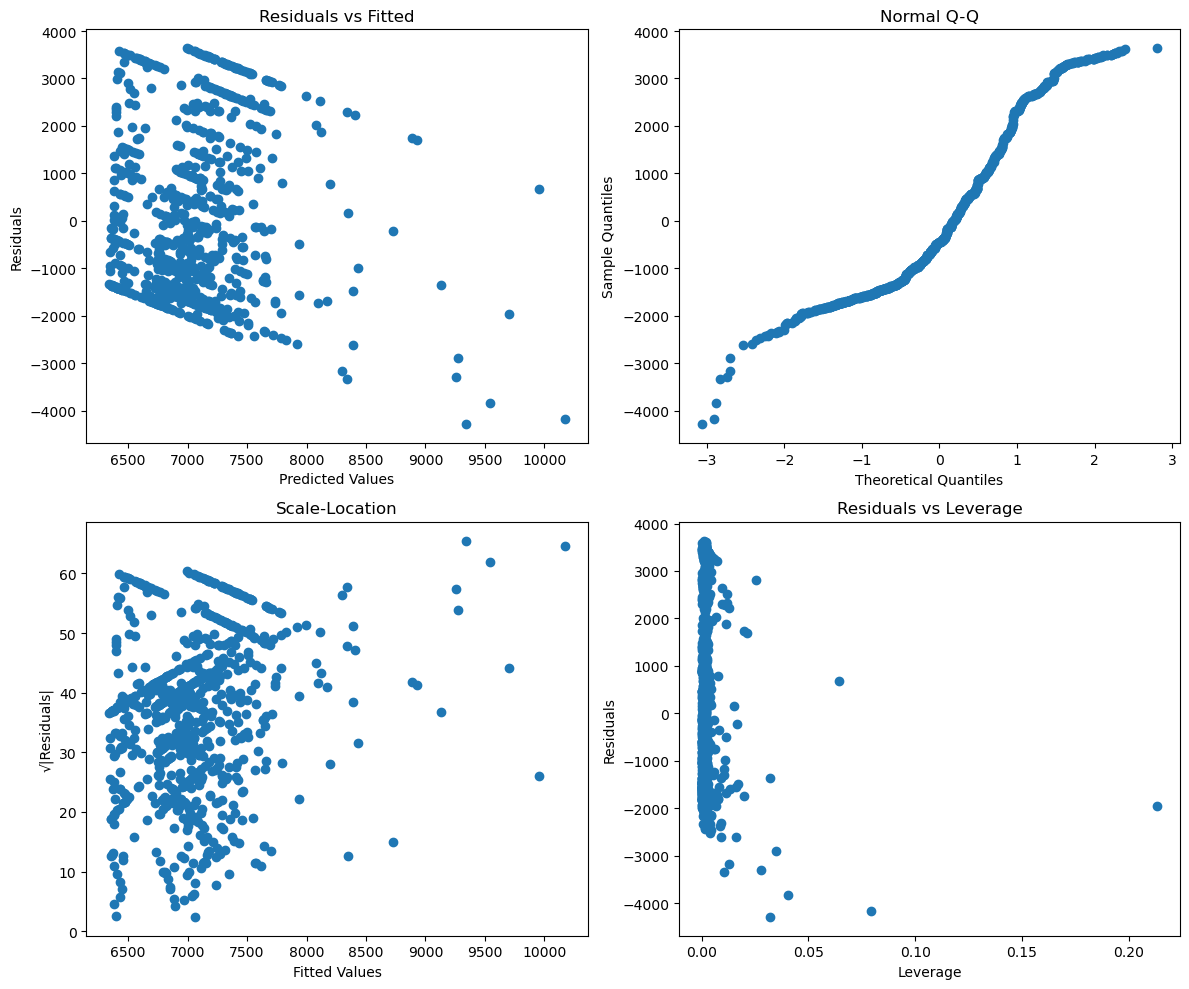

Importance of MonthlyPayment: 0.7115
Importance of IncomeTotal: 0.2885


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib


data = pd.read_csv('data.csv')

data = data[data['desired_saving'] >= 5000]

X = data[['MonthlyPayment',	'IncomeTotal']]
y = data['desired_saving']
# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

# Print performance metrics
print("Model Performance Metrics:")
print(f"R-squared (R²) Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² score: {np.mean(cv_scores):.4f}")

# Print model coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Function to predict desired savings and calculate months to reach savings goal
def predict_savings_and_time(monthly_payment, total_income, savings_goal):
    input_scaled = scaler.transform([[monthly_payment, total_income]])
    predicted_savings = model.predict(input_scaled)[0]
    
    # Calculate disposable income
    disposable_income = total_income - monthly_payment
    
    # Cap the predicted savings at 50% of disposable income
    max_savings = disposable_income * 0.5
    predicted_savings = min(predicted_savings, max_savings)
    
    savings_percentage = (predicted_savings / total_income) * 100
    months_to_goal = max(min(int(np.ceil(savings_goal / predicted_savings)), 96), 1) if predicted_savings > 0 else 96
    
    return predicted_savings, savings_percentage, months_to_goal

# Example usage
monthly_payment = 3000
total_income = 7000
savings_goal = 20000
predicted_savings, savings_percentage, months_to_goal = predict_savings_and_time(monthly_payment, total_income, savings_goal)
print(f"\nFor monthly payment of ${monthly_payment} and total income of ${total_income}:")
print(f"Predicted desired savings: ${predicted_savings:.2f}")
print(f"Savings percentage of total income: {savings_percentage:.2f}%")
print(f"Months to reach savings goal of ${savings_goal}: {months_to_goal}")

# Diagnostic Plots
plt.figure(figsize=(12, 10))

# Residuals vs Fitted
plt.subplot(221)
plt.scatter(y_pred, y_test - y_pred)
plt.title('Residuals vs Fitted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# QQ-plot
plt.subplot(222)
residuals = y_test - y_pred
residuals_sorted = np.sort(residuals)
norm_quantiles = np.random.normal(0, 1, len(residuals))
norm_quantiles_sorted = np.sort(norm_quantiles)
plt.scatter(norm_quantiles_sorted, residuals_sorted)
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Scale-Location
plt.subplot(223)
plt.scatter(y_pred, np.sqrt(np.abs(residuals)))
plt.title('Scale-Location')
plt.xlabel('Fitted Values')
plt.ylabel('√|Residuals|')

# Residuals vs Leverage
plt.subplot(224)
leverage = np.diagonal(X_test_scaled.dot(np.linalg.inv(X_test_scaled.T.dot(X_test_scaled))).dot(X_test_scaled.T))
plt.scatter(leverage, residuals)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Print feature importances (similar to decision tree)
feature_importance = np.abs(model.coef_) / np.sum(np.abs(model.coef_))
features = X.columns
for f, imp in zip(features, feature_importance):
    print(f"Importance of {f}: {imp:.4f}")

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import pickle

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

# Print performance metrics
print("Model Performance Metrics:")
print(f"R-squared (R²) Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² score: {np.mean(cv_scores):.4f}")

# Print model coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Function to predict desired savings and calculate months to reach savings goal
def predict_savings_and_time(monthly_payment, total_income, savings_goal):
    input_scaled = scaler.transform([[monthly_payment, total_income]])
    predicted_savings = model.predict(input_scaled)[0]
    
    # Calculate disposable income
    disposable_income = total_income - monthly_payment
    
    # Cap the predicted savings at 50% of disposable income
    max_savings = disposable_income * 0.5
    predicted_savings = min(predicted_savings, max_savings)
    
    savings_percentage = (predicted_savings / total_income) * 100
    months_to_goal = max(min(int(np.ceil(savings_goal / predicted_savings)), 96), 1) if predicted_savings > 0 else 96
    
    return predicted_savings, savings_percentage, months_to_goal


# Save the model and scaler using pickle
model_filename = 'linear_regression_model.pkl'
scaler_filename = 'scaler.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

print(f"\nModel saved as {model_filename}")
print(f"Scaler saved as {scaler_filename}")


Model Performance Metrics:
R-squared (R²) Score: 0.0728
Mean Squared Error (MSE): 3160318.8196
Root Mean Squared Error (RMSE): 1777.7286
Mean Absolute Error (MAE): 1511.2836
Cross-validation R² scores: [0.05582347 0.0704754  0.03285286 0.06265779 0.07127676]
Mean CV R² score: 0.0586

Model Coefficients:
MonthlyPayment: 385.6265
IncomeTotal: 156.3429
Intercept: 7008.2200

Model saved as linear_regression_model.pkl
Scaler saved as scaler.pkl
